# Clustering data to identify areas that have better skills in certain subjects

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_csv('zno_preprocessed.csv')

/Users/nazardrushchak/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (83,84,85,86,87,88,102) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Preprocessing

In [3]:
df = data.dropna(subset=['ukrteststatus','eoareaname'])
df = df.drop(columns=['outid'])

In [4]:
for column in df.columns:
    if df[column].dtypes=='O':
        encoder = {value:i for i,value in enumerate(df[column].unique())}
        df[column] = df[column].map(lambda x: encoder[x] if not pd.isna(x) else -1)

In [5]:
df = df.fillna(-1)
df

,birth,sextypename,regname,areaname,tername,regtypename,eoname,eotypename,eoregname,eoareaname,...,engdpalevel,engball,fradpalevel,fraball,deudpalevel,deuball,spadpalevel,spaball,ukradaptscale,age
0,2001,0,0,0,0,0,0,0,0,0,...,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1.0,17
1,2001,1,1,1,1,0,1,1,1,1,...,1,63.0,-1,-1.0,-1,-1.0,-1,-1.0,-1.0,17
2,2000,1,2,2,2,0,2,2,2,2,...,1,55.0,-1,-1.0,-1,-1.0,-1,-1.0,-1.0,18
3,2000,0,3,3,3,0,3,0,3,3,...,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1.0,18
4,1999,0,3,4,4,1,4,3,3,4,...,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458109,2004,0,15,18,20,0,2677,1,15,19,...,2,58.0,-1,-1.0,-1,-1.0,-1,-1.0,0.0,17
1458113,2003,1,22,48,998,0,17608,0,22,65,...,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,0.0,18
1458117,2003,1,3,280,530,1,13753,27,3,412,...,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,0.0,18
1458120,2004,0,13,233,5349,0,13778,0,13,352,...,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,0.0,17


## Search best number of clusters

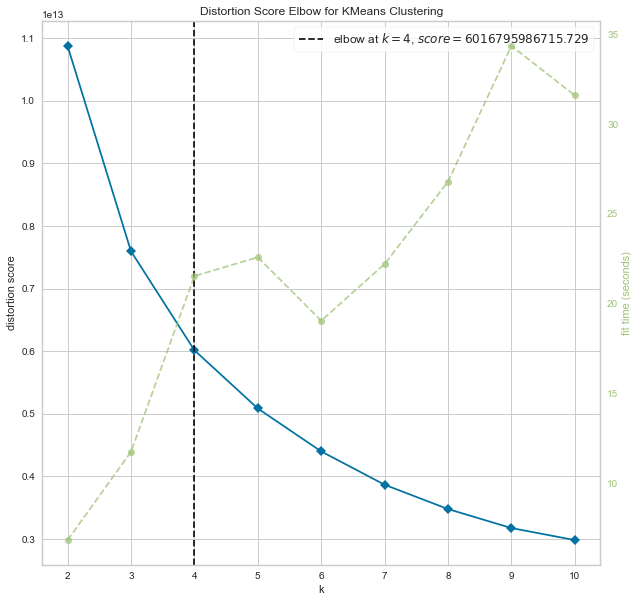

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
model = KMeans(random_state=42, n_clusters=10)
frequency_visualizer = KElbowVisualizer(model, k=10,  size=(720, 720), timings= True)
frequency_visualizer.fit(df)
frequency_visualizer.show()

## Clustering

In [7]:
model = KMeans(random_state=42, n_clusters=4)

In [8]:
model.fit(df)

KMeans(n_clusters=4, random_state=42)

In [9]:
df['cluster'] = model.predict(df)

## Postprocessing and grouping tername+year and aggregate for clusters

In [10]:
ball_col = [column for column in df.columns 
                     if column.endswith('ball')]
#scale
for col in ball_col:      
    for year in df.year.unique():
        
        max_val = df.loc[df['year']==year,col].max()
        df.loc[df['year']==year,col] = df.loc[df['year']==year,col].map(lambda x: x/max_val if x !=-1 else -1)
    
df

,birth,sextypename,regname,areaname,tername,regtypename,eoname,eotypename,eoregname,eoareaname,...,engball,fradpalevel,fraball,deudpalevel,deuball,spadpalevel,spaball,ukradaptscale,age,cluster
0,2001,0,0,0,0,0,0,0,0,0,...,-1.000000,-1,-1.0,-1,-1.0,-1,-1.0,-1.0,17,0
1,2001,1,1,1,1,0,1,1,1,1,...,0.875000,-1,-1.0,-1,-1.0,-1,-1.0,-1.0,17,0
2,2000,1,2,2,2,0,2,2,2,2,...,0.763889,-1,-1.0,-1,-1.0,-1,-1.0,-1.0,18,0
3,2000,0,3,3,3,0,3,0,3,3,...,-1.000000,-1,-1.0,-1,-1.0,-1,-1.0,-1.0,18,0
4,1999,0,3,4,4,1,4,3,3,4,...,-1.000000,-1,-1.0,-1,-1.0,-1,-1.0,-1.0,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458109,2004,0,15,18,20,0,2677,1,15,19,...,0.805556,-1,-1.0,-1,-1.0,-1,-1.0,0.0,17,0
1458113,2003,1,22,48,998,0,17608,0,22,65,...,-1.000000,-1,-1.0,-1,-1.0,-1,-1.0,0.0,18,1
1458117,2003,1,3,280,530,1,13753,27,3,412,...,-1.000000,-1,-1.0,-1,-1.0,-1,-1.0,0.0,18,1
1458120,2004,0,13,233,5349,0,13778,0,13,352,...,-1.000000,-1,-1.0,-1,-1.0,-1,-1.0,0.0,17,3


In [11]:
def mean_score(x):
    return x[x!=-1].mean()

def main_cluster(x):
    return x.value_counts().idxmax() #.to_dict() #

agg_list = {
    col:mean_score for col in [column for column in df.columns 
                                if column.endswith('ball')]
}

agg_list['cluster'] = main_cluster
df_stat = df.groupby(['tername','year']).agg(agg_list)

In [12]:
df_stat

ukrball  histball  mathball  physball  chemball   bioball  \
tername year                                                               
0       2018  0.180861  0.279497  0.240323  0.333333       NaN  0.308088   
        2019  0.168522  0.245441  0.235023       NaN       NaN  0.324107   
        2020  0.170072  0.286348  0.145161       NaN       NaN  0.308537   
        2021  0.209052  0.273936  0.202322  0.375000       NaN  0.426829   
1       2018  0.504005  0.449130  0.429952  0.387847  0.466026  0.488145   
...                ...       ...       ...       ...       ...       ...   
5521    2021  0.407328  0.414894       NaN       NaN       NaN  0.457317   
5522    2021  0.599138  0.409574  0.350746       NaN       NaN  0.658537   
5523    2021  0.344828  0.223404  0.104478       NaN       NaN       NaN   
5524    2021  0.379310  0.462766  0.111940       NaN       NaN       NaN   
5525    2021  0.344828       NaN  0.044776       NaN       NaN  0.426829   

               geoball   engball  fraball   deuball  spaball  cluster  
tername year                                                           
0       2018       NaN  0.361111      NaN       NaN      NaN        0  
        2019       NaN  0.618056      NaN       NaN      NaN        1  
        2020       NaN  0.325000      NaN       NaN      NaN        1  
        2021  0.393258  0.437500      NaN       NaN      NaN        1  
1       2018  0.448407  0.564986      NaN  0.638889      NaN        0  
...                ...       ...      ...       ...      ...      ...  
5521    2021  0.516854  0.194444      NaN       NaN      NaN        1  
5522    2021  0.539326       NaN      NaN       NaN      NaN        3  
5523    2021  0.269663       NaN      NaN       NaN      NaN        3  
5524    2021  0.584270  0.166667      NaN       NaN      NaN        1  
5525    2021       NaN  0.236111      NaN       NaN      NaN        2  

[20171 rows x 12 columns]

In [13]:
df_stat.cluster.value_counts()

3    8429
2    4262
1    4212
0    3268
Name: cluster, dtype: int64

In [24]:
agg_list = {
    col:mean_score for col in [column for column in df_stat.columns 
                                if column.endswith('ball')]
}

agg_list['tername'] = list

df_stat = df_stat.reset_index().groupby(['cluster','year']).agg(agg_list)

In [25]:
df_stat = df_stat.reset_index()

In [26]:
df_stat[['cluster','year','ukrball']]

,cluster,year,ukrball
0,0,2018,0.425866
1,0,2019,0.406357
2,0,2020,0.453816
3,0,2021,0.476832
4,1,2018,0.401673
5,1,2019,0.425486
6,1,2020,0.458571
7,1,2021,0.469781
8,2,2018,0.423289
9,2,2019,0.401483


## Cluster heatmap vizualisation 

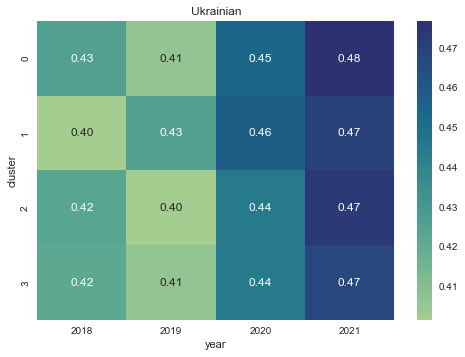

In [19]:
pivot_ukr = pd.pivot_table(df_stat, values='ukrball', index=['cluster'],
                      columns=['year'], aggfunc=np.mean, fill_value=0)
sns.heatmap(pivot_ukr, annot=True, fmt=".2f",cmap="crest")
plt.title('Ukrainian')
plt.show()

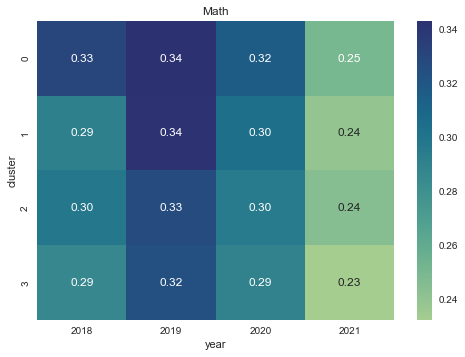

In [20]:
pivot_math = pd.pivot_table(df_stat, values='mathball', index=['cluster'],
                      columns=['year'], aggfunc=np.mean, fill_value=0)
sns.heatmap(pivot_math, annot=True, fmt=".2f",cmap="crest")
plt.title('Math')
plt.show()

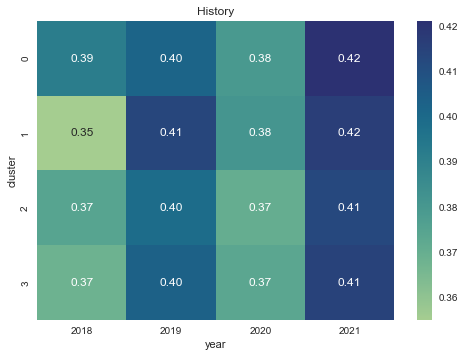

In [21]:
pivot_hist = pd.pivot_table(df_stat, values='histball', index=['cluster'],
                      columns=['year'], aggfunc=np.mean, fill_value=0)
sns.heatmap(pivot_hist, annot=True, fmt=".2f",cmap="crest")
plt.title('History')
plt.show()

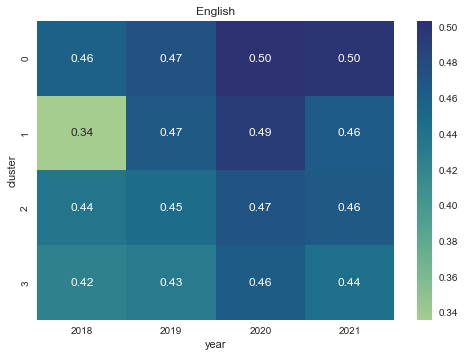

In [22]:
pivot_eng = pd.pivot_table(df_stat, values='engball', index=['cluster'],
                      columns=['year'], aggfunc=np.mean, fill_value=0)
sns.heatmap(pivot_eng, annot=True, fmt=".2f",cmap="crest")
plt.title('English')
plt.show()

Despite applying a clustering and grouping process to the ZNO dataset by subject name and creating a heatmap, no discernible patterns could be identified from the visual representation. It implies that the data points for each subject name were grouped together, but the resulting heatmap did not show any clear trends or relationships between the data points.